<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [28]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [29]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [30]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

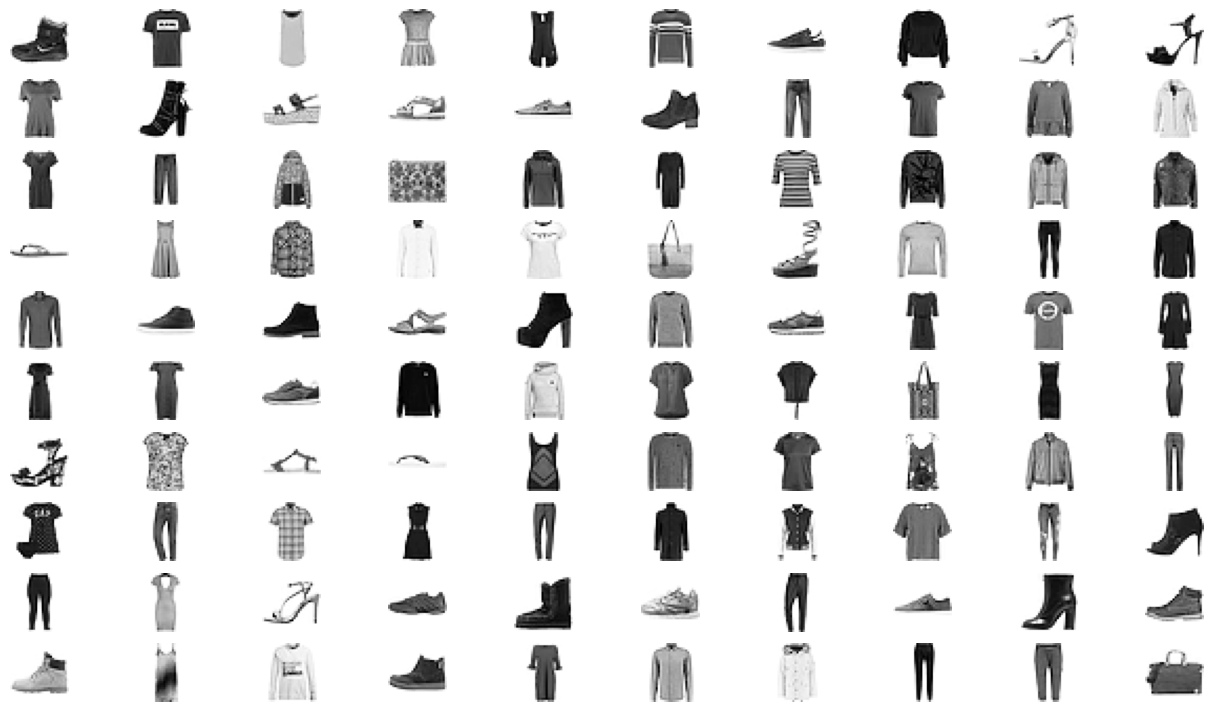

In [31]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

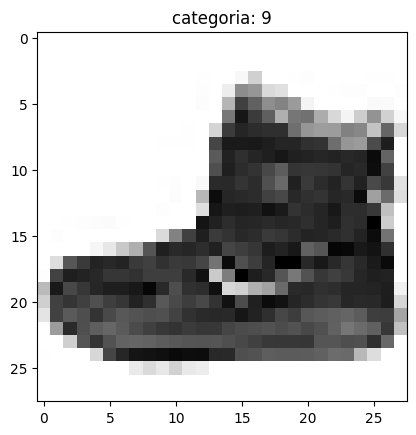

In [32]:
# Alumno, dibuje la primera imagen y su correspondiente categoria
plt.imshow(data_X_train[0], cmap= 'Greys')

ax.axis('off')
plt.title("categoria: " + str(data_y_train[0]))

plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [33]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14,:])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [34]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [35]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
print('Cantidad de datos en observación:', X_train_norm.shape[0])

Cantidad de datos en observación: 60000


In [36]:
# Alumno: Imprimir la dimension de la imagen
print('Dimensión de la imagen:', X_train_norm[0].shape)

Dimensión de la imagen: (28, 28)


In [37]:
# Alumno: En estas imagenes sin escalas de grieses no vienen con el canal especificado
# Deberia ser (28, 28, 1) para poder utilizar en una red CNN
# Agregar el [samples][pixels][width][height]
X_train = X_train_norm.reshape(data_X_train.shape[0], data_X_train.shape[1], data_X_train.shape[2], 1).astype('float32')
X_test = X_test_norm.reshape(data_X_test.shape[0], data_X_test.shape[1], data_X_test.shape[2], 1).astype('float32')
X_train.shape

(60000, 28, 28, 1)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

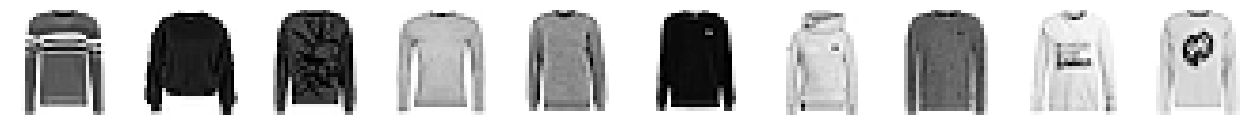

In [38]:
# Alumno: Explor los primeros diez puloveres del dataset de train
fig = plt.figure(figsize= (16,9))

p = 0

for i in range(10):
    ax = fig.add_subplot(1,10, i+1)
    ax.axis('off')

    while True:
      if data_y_train[p]== 2:
          ax.imshow(X_train_norm[p], cmap= 'Greys')
          p += 1
          break
      p += 1
plt.show()

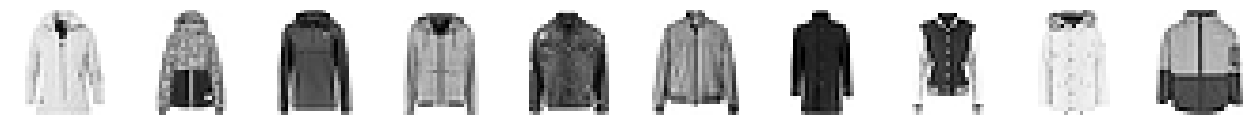

In [39]:
# Alumno: Explor los primeros diez sacos del dataset de train
fig = plt.figure(figsize=(16, 9))

s = 0

for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    ax.axis('off')

    while True:
        if data_y_train[s]== 4:
            plt.imshow(X_train_norm[s], cmap='Greys')
            s += 1
            break
        s += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [40]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

In [41]:
# input shape
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [42]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [43]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D # Sino funciona este, usar el siguiente
#from keras.layers.convolutional import Conv2D, MaxPooling2D

# Alumno, crear un modelo con la cantidad de capas de CONV y POOL
# que vea que da mejor resultado
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5, 5), strides = (1,1), padding = 'same', activation = 'relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Flatten())

model.add(Dense(units = 62, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = out_shape, activation = 'softmax'))

model.compile(optimizer = "Adam",
              loss = 'categorical_crossentropy',
              metrics =['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 62)                97278     
                                                                 
 dropout_1 (Dropout)         (None, 62)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                630       
                                                      

In [44]:
# Alumno: entrenar el modelo
history = model.fit(X_train, y_train, validation_split= 0.2, epochs= 10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6196 - accuracy: 0.7839 - val_loss: 0.4095 - val_accuracy: 0.8524
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4076 - accuracy: 0.8535 - val_loss: 0.3532 - val_accuracy: 0.8737
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3572 - accuracy: 0.8715 - val_loss: 0.3225 - val_accuracy: 0.8836
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3283 - accuracy: 0.8806 - val_loss: 0.3027 - val_accuracy: 0.8904
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3042 - accuracy: 0.8894 - val_loss: 0.2872 - val_accuracy: 0.8965
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2872 - accuracy: 0.8960 - val_loss: 0.2838 - val_accuracy: 0.8983
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2711 - accuracy: 0.9009 - val_loss: 0.2734 - val_accuracy: 0.8992
Epoch 

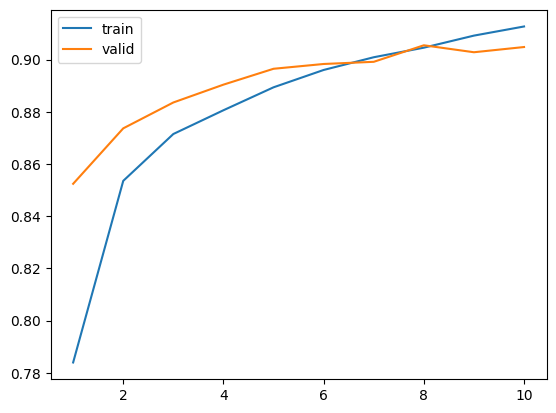

In [45]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [46]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

313/313 [==============================] - 1s 2ms/step


array([[4.9257255e-06, 3.9142609e-08, 9.0631229e-06, 3.3941367e-06,
        1.7222125e-07, 1.8834829e-03, 3.1951229e-06, 2.6249166e-03,
        6.3750711e-05, 9.9540710e-01],
       [8.3078539e-06, 1.8012478e-13, 9.9994338e-01, 7.6384510e-10,
        3.5833786e-05, 1.4514571e-13, 1.2460568e-05, 3.9302032e-15,
        7.1940237e-10, 2.3619764e-13],
       [1.3057300e-07, 9.9999642e-01, 6.0821739e-09, 3.4216293e-06,
        2.6632762e-08, 4.4186675e-11, 4.1747947e-09, 4.2135043e-13,
        2.9023832e-09, 8.6949007e-12]], dtype=float32)

In [47]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob, axis=1)
y_hat[:3]

array([9, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [48]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores= model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.2734 - accuracy: 0.8987


0.8986999988555908

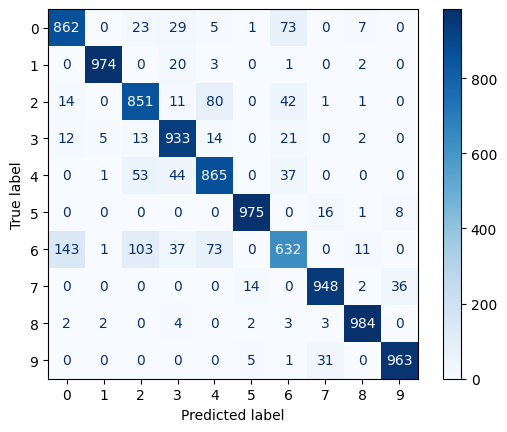

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [50]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [55]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
X_test_saco = X_test[rank_saco]
y_test_saco = y_test[rank_saco]

In [56]:
# Alumno: Calcular la exactitud de los sacos seleccionados
score= model.evaluate(X_test_saco, y_test_saco)
score[1]

1/1 [==============================] - 0s 73ms/step - loss: 1.3145 - accuracy: 0.5000


0.5

In [58]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
y_hat_prob = model.predict(X_test_saco)
y_hat = np.argmax(y_hat_prob, axis= 1)
y_hat

1/1 [==============================] - 0s 17ms/step


array([4, 4, 2, 6, 4, 2, 4, 2, 4, 2])

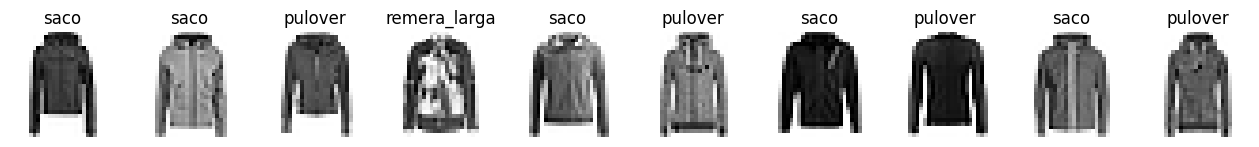

In [61]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría
fig = plt.figure(figsize=(16,9))
s = 0
for i in rank_saco:
    ax= fig.add_subplot(1,10,s+1)
    ax.axis('off')
    ax.imshow(X_test_norm[i], cmap='Greys')
    ax.set_title(category_list[y_hat[s]])
    s+=1
plt.show()